In [1]:
import numpy as np
import utils
import pandas as pd

In [2]:
data = pd.DataFrame({"a":[1,2,np.nan], "b":[3,np.nan,5]}, columns=["a","b"])
print(data.head())
print("-------------")
print(data.sum())
print("-------------")
print(np.array(np.array([1,2])+data.sum()))
print(data[data["b"].isnull()]["a"])


     a    b
0  1.0  3.0
1  2.0  NaN
2  NaN  5.0
-------------
a    3.0
b    8.0
dtype: float64
-------------
[ 4. 10.]
1    2.0
Name: a, dtype: float64


In [3]:
for i, r in data.iterrows():
    if pd.isna(r["b"]):
        r["b"] = -1
        
print(data)

     a    b
0  1.0  3.0
1  2.0 -1.0
2  NaN  5.0


In [4]:
from itertools import permutations


IMPUTATIONS = ["cca", "mean", "mice_def", "coldel"]  # , "reg"]
IMPUTATION_COMBOS = [perm[0]+perm[1] for perm in permutations(IMPUTATIONS, 2)]

In [18]:
synth_regular = utils.load_synthetic()
compas = utils.load_compas_alt()
RESPONSE = "two_year_recid"

In [20]:
synth_regular["train"].head()

,priors_count,two_year_recid,is_Caucasian,crime_factor,age_factor_greater_than_45,age_factor_less_than_25,gender_factor
1998,4.0,1,0,1,0,0,1
1999,4.0,1,1,1,0,0,1
2000,4.0,1,0,1,0,0,1
2001,3.0,0,0,1,0,0,0
2002,4.0,0,0,0,0,0,0


In [21]:
compas["train"].head()

,priors_count,crime_factor,gender_factor,is_Caucasian,age_factor_Greater than 45,age_factor_Less than 25,two_year_recid
1824,3,0,1,1,0,0,0
2895,9,0,1,0,0,0,0
4347,2,1,1,1,0,0,0
3161,7,0,1,0,0,0,0
4917,0,1,1,0,0,0,0


In [6]:
#Checking that the classes don't become too much more imbalanced when data is removed.

#Synthetic data
for key, value in synth_regular.items():
    #print(value.columns)
    print("Key: ", key)
    print("Caucasian = 1: ",len(value[value["is_Caucasian"]==1])/len(value) ,
    "\nCaucasian = 0: ", len(value[value["is_Caucasian"]==0])/len(value))
    print("Male = 1: ",len(value[value["gender_factor"]==1])/len(value) ,
    "\nMale = 0: ", len(value[value["gender_factor"]==0])/len(value))
    print("After 30% missing: ")
    temp = value.copy()
    temp = utils.impute(utils.data_remover_cat(temp, "is_Caucasian", 30), "is_Caucasian", "is_Caucasian")
    print("Caucasian = 1: ",len(temp[temp["is_Caucasian"]==1])/len(temp) ,
        "\nCaucasian = 0: ", len(temp[temp["is_Caucasian"]==0])/len(temp))
    print("Male = 1: ",len(temp[temp["gender_factor"]==1])/len(temp) ,
        "\nMale = 0: ", len(temp[temp["gender_factor"]==0])/len(temp))

Key:  test
Caucasian = 1:  0.34934934934934936 
Caucasian = 0:  0.6506506506506506
Male = 1:  0.8053053053053053 
Male = 0:  0.1946946946946947
After 30% missing: 
Caucasian = 1:  0.33112033195020746 
Caucasian = 0:  0.6688796680497925
Male = 1:  0.7717842323651453 
Male = 0:  0.22821576763485477
Key:  train
Caucasian = 1:  0.3370814592703648 
Caucasian = 0:  0.6629185407296352
Male = 1:  0.8110944527736131 
Male = 0:  0.1889055472263868
After 30% missing: 
Caucasian = 1:  0.31614654002713705 
Caucasian = 0:  0.683853459972863
Male = 1:  0.7526006331976481 
Male = 0:  0.2473993668023519


In [7]:
#Compas data
"""for ver in ["standard", "violent"]:
    print("Compas dataset type: ", ver)"""
for key, value in compas.items():
    #print(value.columns)
    print("Key: ", key)
    print("Caucasian = 1: ",len(value[value["is_Caucasian"]==1])/len(value) ,
    "\nCaucasian = 0: ", len(value[value["is_Caucasian"]==0])/len(value))
    print("Male = 1: ",len(value[value["gender_factor"]==1])/len(value) ,
    "\nMale = 0: ", len(value[value["gender_factor"]==0])/len(value))
    print("Response: ", len(value[value["two_year_recid"]==1])/len(value))
    print("After 90% missing: ")
    temp = value.copy()
    temp = utils.impute(utils.data_remover_cat(temp, "is_Caucasian", 90), "is_Caucasian","is_Caucasian")
    print("sum", temp["two_year_recid"].sum())
    print("Caucasian = 1: ",len(temp[temp["is_Caucasian"]==1])/len(temp) ,
        "\nCaucasian = 0: ", len(temp[temp["is_Caucasian"]==0])/len(temp))
    print("Male = 1: ",len(temp[temp["gender_factor"]==1])/len(temp) ,
        "\nMale = 0: ", len(temp[temp["gender_factor"]==0])/len(temp))
    print("Response: ", len(temp[temp["two_year_recid"]==1])/len(temp))


Key:  train
Caucasian = 1:  0.3383313180169287 
Caucasian = 0:  0.6616686819830714
Male = 1:  0.8084643288996373 
Male = 0:  0.19153567110036276
Response:  0.5458282950423217
After 90% missing: 
sum 199
Caucasian = 1:  0.36127167630057805 
Caucasian = 0:  0.638728323699422
Male = 1:  0.7283236994219653 
Male = 0:  0.27167630057803466
Response:  0.5751445086705202
Key:  test
Caucasian = 1:  0.34560628375061364 
Caucasian = 0:  0.6543937162493864
Male = 1:  0.8119783996072656 
Male = 0:  0.1880216003927344
Response:  0.5429553264604811
After 90% missing: 
sum 112
Caucasian = 1:  0.34782608695652173 
Caucasian = 0:  0.6521739130434783
Male = 1:  0.9006211180124224 
Male = 0:  0.09937888198757763
Response:  0.6956521739130435


In [8]:
IMPUTATIONS = ["fair_reg_95"]#, "fair_reg_99"]  # , "reg"]
IMPUTATION_COMBOS = [perm[0]+"|"+perm[1] for perm in permutations(IMPUTATIONS, 2)]

In [9]:
IMPUTATION_COMBOS

[]

In [10]:
a = [1,2,3]
a+=[1,2,3]

In [11]:
a

[1, 2, 3, 1, 2, 3]

In [12]:
#percentiles = [p for p in range(0,20,2)]+[p for p in range(20,80, 10)]
percentiles = [p for p in range(60,80, 10)]
#TODO test missing = Sensitive in case code crashes
missing=["is_Caucasian"]#, "two_year_recid"]# "is_Caucasian"]#, "gender_factor", "crime_factor"]
all_results = {"Full data": {}, "Averaged results": {} }
RUNS = 2
for miss in missing:
    for sensitive in ["is_Caucasian"]:#, "gender_factor"]:
        #try:
        recid_results = utils.test_bench(data = "compas", pred = RESPONSE, missing = miss, sensitive=sensitive,
                        percentiles = percentiles, n_runs=RUNS)
        #synth_results = utils.test_bench(data = "synthetic", pred = RESPONSE, missing = miss, sensitive=sensitive,
                            #percentiles = percentiles, n_runs=RUNS)
        #TODO and remember to fix data v_recid_results = utils.test_bench(train = compas["standard"]["train"],test = compas["standard"]["test"], pred = RESPONSE, missing = miss, sensitive=sensitive,
                        #percentiles = percentiles)
        #all_results[miss+"_"+sensitive+"_"+"synth"] = synth_results 
        all_results["Full data"][miss+"_"+sensitive+"_"+"recid"] = recid_results["Full data"]
        all_results["Averaged results"][miss+"_"+sensitive+"_"+"recid"] = recid_results["Averaged results"]
        #except:
            #print("failed at " + sensitive + miss)
        """try:
            synth_results = utils.test_bench(train = synth_regular["train"],test = synth_regular["test"], pred = RESPONSE, missing = miss, sensitive=sensitive,
                            percentiles = percentiles)
            recid_results = utils.test_bench(train = compas["train"],test = compas["test"], pred = RESPONSE, missing = miss, sensitive=sensitive,
                            percentiles = percentiles)
            #TODO and remember to fix data v_recid_results = utils.test_bench(train = compas["standard"]["train"],test = compas["standard"]["test"], pred = RESPONSE, missing = miss, sensitive=sensitive,
                            #percentiles = percentiles)
            all_results[miss+"_"+sensitive+"_"+"synth"] = synth_results 
            all_results[miss+"_"+sensitive+"_"+"recid"] = recid_results 
            #all_results[miss+"_"+sensitive+"_"+"v_recid"] = v_recid_results
        except Exception as e:
            print("Exception: ", e)
            print("Parameters: ", sensitive+"_"+miss) 
        """

100%|██████████| 2/2 [11:42<00:00, 351.44s/it]


<Figure size 1440x792 with 0 Axes>

In [13]:
IMPUTATIONS = ["cca", "mean", "mice_def", "coldel"]# , "reg"]
IMPUTATION_COMBOS = [perm[0]+"|"+perm[1] for perm in permutations(IMPUTATIONS, 2)]

In [14]:
IMPUTATION_COMBOS

['cca|mean',
 'cca|mice_def',
 'cca|coldel',
 'mean|cca',
 'mean|mice_def',
 'mean|coldel',
 'mice_def|cca',
 'mice_def|mean',
 'mice_def|coldel',
 'coldel|cca',
 'coldel|mean',
 'coldel|mice_def']

In [15]:
import json
from pathlib import Path
with open(Path("raw_data/test.json"), 'w') as f:
            json.dump(all_results, f)

In [16]:
all_results["Averaged results"]["priors_count_is_Caucasian_recid"].keys()

KeyError: 'priors_count_is_Caucasian_recid'

In [ ]:
all_results["Full data"]["priors_count_is_Caucasian_recid"]["0"]['mar']['spd']['log_reg']["fair_reg_99"]

KeyError: 'fair_reg_99'

In [ ]:
import matplotlib.pyplot as plt
eosum_mcar = all_results["Averaged results"]["priors_count_is_Caucasian_recid"]['mcar|eosum|log_reg|fair_reg_99']
eosum_mar = all_results["Averaged results"]["priors_count_is_Caucasian_recid"]['mar|eosum|log_reg|fair_reg_99']
tpr1_mar = all_results["Averaged results"]["priors_count_is_Caucasian_recid"]['mar|tpr1|log_reg|fair_reg_99']
tpr1_mcar = all_results["Averaged results"]["priors_count_is_Caucasian_recid"]['mcar|tpr1|log_reg|fair_reg_99']
spd_mar = all_results["Averaged results"]["priors_count_is_Caucasian_recid"]['mar|spd|log_reg|fair_reg_99']
spd_mcar = all_results["Averaged results"]["priors_count_is_Caucasian_recid"]['mcar|spd|log_reg|fair_reg_99']

In [1]:
for i in [1,2]:
    for j in [3,4]:
        try:
            raise AttributeError("AAAAA")
        except:
            print(i,j)
            continue

1 3
1 4
2 3
2 4


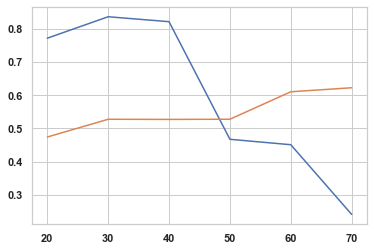

In [ ]:
plt.plot(percentiles, eosum_mar)
plt.plot(percentiles, eosum_mcar)

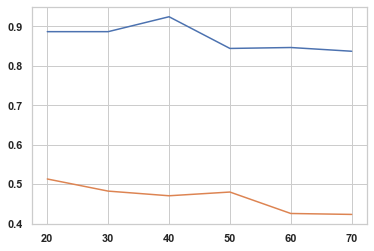

In [ ]:
plt.plot(percentiles, tpr1_mar)
plt.plot(percentiles, tpr1_mcar)

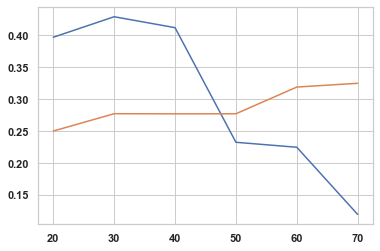

In [ ]:
plt.plot(percentiles, spd_mar)
plt.plot(percentiles, spd_mcar)